In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Algorithm, where F' is derivative in initial point, so method has linear convergence; c - parameter of convergence speed from Newton-Broyden method. If convergence is bad, c must be in [0, 1], else it may be > 1;

$$ x^{k+1}\ =\ x^{k}\ -\ c \ \frac{F(x^k)}{F'_0(x^k)},\ k\ =\ 1,\ 2,\ 3,\ ...$$ 

Equation to solve and it's derivative:

In [23]:
def f_x(x):
    return x ** 3 - x ** 2 + x + 2

In [24]:
def derivative_f(x):
    return 3 * x ** 2 - 2 * x + 1

Service functions:

In [25]:
def tangent(a, f_x, derivative, xa, simple=False, x_0=None):
    """
    :param a: float; define dot, where we plot line
    :param f_x: function; function for what we plot line
    :param derivative: function; derivative of f_x
    :param xa: ndarray; arg of f_x
    :param simple: bool; flag for simple method
    :param x_0: float; point from where iteration process was started
    :return: ndarray; tangent line in point a
    """
    if simple:
        return f_x(a) + derivative(x_0) * (xa - a)
    else:
        return f_x(a) + derivative(a) * (xa - a)

In [83]:
def plot_tangent(f_x, derivative, x_ax, num_iter, hist, simple=False):
    """
    :param f_x: function to that tangent line will be plotted
    :param derivative: derivative of above function
    :param x_ax: ndarray for plotting
    :param num_iter: sets iteration for which tangent line will be plotted
    Function will plot line on the active axes
    """
    if simple:
        # using tangent angle from first point
        tangent_line = tangent(hist[1][num_iter], f_x, derivative, x_ax, simple=True, x_0=hist[1][0])
        ax.plot(x_ax[np.where(tangent_line > 0)], (tangent_line[np.where(tangent_line > 0)]))
        x_next = -f_x(hist[1][num_iter]) / derivative(hist[1][0]) + hist[1][num_iter]
    else:
        tangent_line = tangent(hist[1][num_iter], f_x, derivative, x_ax)
        ax.plot(x_ax[np.where(tangent_line > 0)], (tangent_line[np.where(tangent_line > 0)]))
        x_next = -f_x(hist[1][num_iter]) / derivative(hist[1][num_iter]) + hist[1][num_iter]
    # dot on Ox
    ax.scatter(x_next, 0, marker='x', s=45, label=f'X for {num_iter + 1} iter')
    ax.legend()
    # Function value in above dot. X_k+1 for iteration process.
    ax.vlines(x_next, ymax=f_x(x_next), ymin=0, linestyle='--')

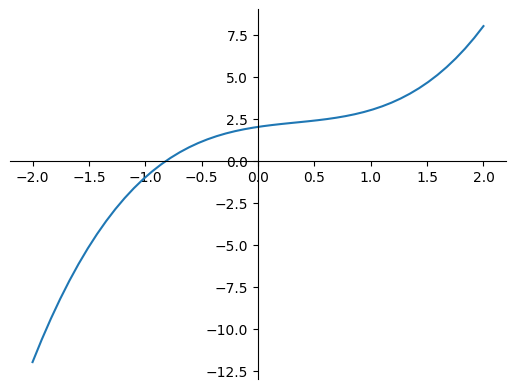

In [84]:
xa = np.linspace(-2, 2, 50)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xa, f_x(xa))
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

Iteration process:

In [85]:
def optimize(f_x, derivative_f, x, delta=0.0001, c=1, simple=False):

    cnt = 0
    x_next = 0
    hist = [[] for i in range(3)]
    df_dx = derivative_f(x)

    while 1:
        if simple:
            x_next = x - c * (f_x(x) / df_dx)
        else:
            x_next = x - c * (f_x(x) / derivative_f(x))

        x = x_next

        hist[0].append(cnt)
        hist[1].append(x)
        hist[2].append(f_x(x))

        cnt += 1
        if cnt > 2:
            if abs(hist[2][cnt - 2] - f_x(x)) < delta:
                break

    return hist

In [86]:
hist = optimize(f_x, derivative_f, 3., simple=True)
d_first = {'num iter': hist[0], 'x': hist[1], 'f(x)': hist[2]}
# will print history of iterations
df = pd.DataFrame(data=d_first)
df.style.hide(axis="index")

num iter,x,f(x)
0,1.954545,7.601146
1,1.609039,5.185844
2,1.373319,4.077399
3,1.187982,3.453282
4,1.031015,3.063984
5,0.891743,2.805656
6,0.764213,2.626508
7,0.644826,2.497145
8,0.531320,2.399011
9,0.422274,2.319256


Notice, it's necessary in 8 times more iterations thats in classical Newton's method.

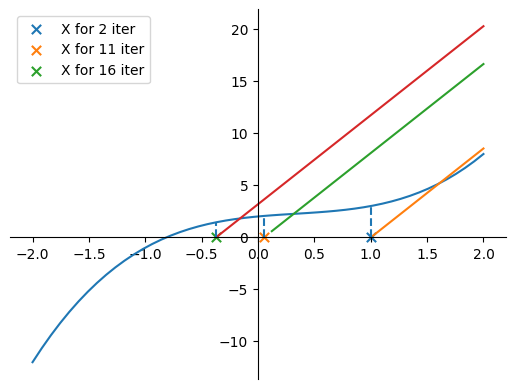

In [87]:
xa = np.linspace(-2, 2, 50)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xa, f_x(xa))
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

cmap = plt.cm.get_cmap('PiYG', len(hist))

plot_tangent(f_x, derivative_f, xa, 1, hist, simple=True)
plot_tangent(f_x, derivative_f, xa, 10, hist, simple=True)
plot_tangent(f_x, derivative_f, xa, 15, hist, simple=True)

We can see that all lines are parellel, because we use only first derivative.